**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2024 &#x25aa; Uhan**

# Lesson 19. Coding Categorical Predictors &ndash; Part 2

## Example 1

Let's look at the data in `ThreeCars2017` from the `Stat2Data` library, which contains information on 90 randomly selected used cars. In particular, we will consider $\mathit{CarType}$ (Accord, Maxima, or Mazda6), $\mathit{Price}$ (in \\$1000s), and $\mathit{Mileage}$ (in 1000s of miles).
We want to predict a car's price based on its mileage and type.

In [1]:
library(Stat2Data)
data(ThreeCars2017)
head(ThreeCars2017)

,CarType,Age,Price,Mileage,Mazda6,Accord,Maxima
,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,Mazda6,3,15.9,17.8,1,0,0
2,Mazda6,2,16.4,19.0,1,0,0
3,Mazda6,1,18.9,20.9,1,0,0
4,Mazda6,2,16.9,24.0,1,0,0
5,Mazda6,2,20.5,24.0,1,0,0
6,Mazda6,1,19.0,24.2,1,0,0


* Let's start by creating a scatterplot, with different point shapes (the `pch` parameter) for each $\mathit{CarType}$
    * [R Documentation for `pch`](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/points.html)

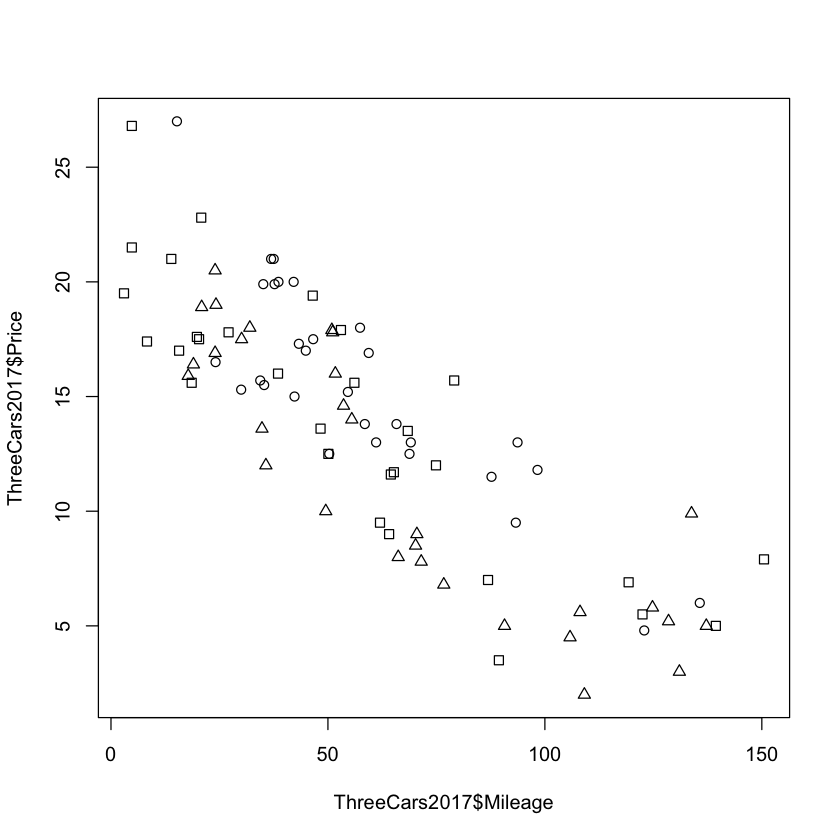

In [2]:
plot(ThreeCars2017$Mileage, ThreeCars2017$Price, 
     pch=ifelse(ThreeCars2017$CarType == "Accord", 0,
                ifelse(ThreeCars2017$CarType == "Maxima", 1, 2)))

## Example 2

* Our model is: 

$$ \mathit{Price} = \beta_0 + \beta_1 \mathit{Mileage} + \beta_2 \mathit{Maxima} + \beta_3 \mathit{Mazda6} + \varepsilon \qquad \varepsilon \sim N(0, \sigma_{\varepsilon}^2) $$

* To fit our model, we can use `as.factor()` to automatically create the indicator variables: 

In [3]:
fit <- lm(Price ~ Mileage + as.factor(CarType), data = ThreeCars2017)
summary(fit)


Call:
lm(formula = Price ~ Mileage + as.factor(CarType), data = ThreeCars2017)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4208 -2.1225 -0.2257  1.6904  6.7866 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              21.087383   0.682805  30.883   <2e-16 ***
Mileage                  -0.124906   0.008252 -15.136   <2e-16 ***
as.factor(CarType)Maxima  1.539735   0.726685   2.119   0.0370 *  
as.factor(CarType)Mazda6 -1.261552   0.733145  -1.721   0.0889 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.813 on 86 degrees of freedom
Multiple R-squared:  0.7518,	Adjusted R-squared:  0.7431 
F-statistic: 86.81 on 3 and 86 DF,  p-value: < 2.2e-16


* We can also use `factor()` to create the indicator variables:

In [4]:
fit <- lm(Price ~ Mileage + factor(CarType), data = ThreeCars2017)
summary(fit)


Call:
lm(formula = Price ~ Mileage + factor(CarType), data = ThreeCars2017)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4208 -2.1225 -0.2257  1.6904  6.7866 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           21.087383   0.682805  30.883   <2e-16 ***
Mileage               -0.124906   0.008252 -15.136   <2e-16 ***
factor(CarType)Maxima  1.539735   0.726685   2.119   0.0370 *  
factor(CarType)Mazda6 -1.261552   0.733145  -1.721   0.0889 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.813 on 86 degrees of freedom
Multiple R-squared:  0.7518,	Adjusted R-squared:  0.7431 
F-statistic: 86.81 on 3 and 86 DF,  p-value: < 2.2e-16


- Using `factor()` gives us more flexibility

- For example, we can specify the reference category with the `levels=...` keyword argument
    - The first category listed in the `levels=...` keyword argument is the reference category

- So, to make `Mazda6` the reference category, we can do this: 

In [5]:
fit <- lm(Price ~ Mileage + factor(CarType, levels = c('Mazda6', 'Maxima', 'Accord')), 
          data = ThreeCars2017)
summary(fit)


Call:
lm(formula = Price ~ Mileage + factor(CarType, levels = c("Mazda6", 
    "Maxima", "Accord")), data = ThreeCars2017)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4208 -2.1225 -0.2257  1.6904  6.7866 

Coefficients:
                                                                 Estimate
(Intercept)                                                     19.825831
Mileage                                                         -0.124906
factor(CarType, levels = c("Mazda6", "Maxima", "Accord"))Maxima  2.801287
factor(CarType, levels = c("Mazda6", "Maxima", "Accord"))Accord  1.261552
                                                                Std. Error
(Intercept)                                                       0.752381
Mileage                                                           0.008252
factor(CarType, levels = c("Mazda6", "Maxima", "Accord"))Maxima   0.730333
factor(CarType, levels = c("Mazda6", "Maxima", "Accord"))Accord   0.733145
                      

* We can predict the price of a particular Maxima with 30000 miles, and obtain the corresponding 90% prediction interval: 

In [6]:
predict(fit, newdata=data.frame(Mileage = 30, CarType = "Maxima"), 
        interval="prediction", level=0.90)

,fit,lwr,upr
1,18.87993,14.11049,23.64938


## Example 4

* The model that would allow for different intercepts AND different slopes in Example 1 is

$$ \mathit{Price} = \beta_0 + \beta_1 \mathit{Mileage} + \beta_2 \mathit{Maxima} + \beta_3 \mathit{Mazda6} + \beta_4 (\mathit{Mileage} \times \mathit{Maxima}) + \beta_5 (\mathit{Mileage} \times \mathit{Mazda6}) + \varepsilon \qquad \varepsilon \sim N(0, \sigma_{\varepsilon}^2) $$

* We can fit this model in R like this:

In [7]:
fit <- lm(Price ~ Mileage + as.factor(CarType) + Mileage:as.factor(CarType), 
          data = ThreeCars2017)
summary(fit)


Call:
lm(formula = Price ~ Mileage + as.factor(CarType) + Mileage:as.factor(CarType), 
    data = ThreeCars2017)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5984 -2.0047 -0.1778  1.8321  6.7536 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      20.809613   0.876372  23.745  < 2e-16 ***
Mileage                          -0.119812   0.012964  -9.242 1.93e-14 ***
as.factor(CarType)Maxima          2.461613   1.467904   1.677   0.0973 .  
as.factor(CarType)Mazda6         -1.016487   1.355525  -0.750   0.4554    
Mileage:as.factor(CarType)Maxima -0.016325   0.022540  -0.724   0.4709    
Mileage:as.factor(CarType)Mazda6 -0.004603   0.018668  -0.247   0.8058    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.837 on 84 degrees of freedom
Multiple R-squared:  0.7533,	Adjusted R-squared:  0.7386 
F-statistic:  51.3 on 5 and 84 DF,  p-value: < 2.2e-16
